In [1]:
import numpy as np
import pandas as pd
from termcolor import colored
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pitcher_data = pd.read_csv('starting_pitcher_data_pitchtype_woba_2018-2019.tsv', sep = '\t')

In [3]:
pitcher_data.head()

,game_pk,game_date,event_inning,top_inning_sw,pitcher,pitch_hand,player_at_bat,n_thruorder_pitcher,hit_into_play_group,is_strike,...,is_walk,api_pitch_type,fangraphs_woba_value,estimated_woba_using_speedangle,pitch_number_thisgame,alan_active_spinrate,api_p_release_spin_rate,event_description,batter_name,pitcher_name
0,529406,2018-03-29,1,Y,502042,R,605141,1.0,field_out,0,...,0.0,FF,0.0,1.701,1,1672.898220,2045.595,Mookie Betts flies out sharply to center field...,Mookie Betts,Chris Archer
1,529406,2018-03-29,1,Y,502042,R,643217,1.0,NaN,1,...,NaN,FF,NaN,NaN,2,1855.568629,2159.595,NaN,Andrew Benintendi,Chris Archer
2,529406,2018-03-29,1,Y,502042,R,643217,1.0,NaN,1,...,NaN,FF,NaN,NaN,3,1925.181992,2212.629,NaN,Andrew Benintendi,Chris Archer
3,529406,2018-03-29,1,Y,502042,R,643217,1.0,field_out,0,...,0.0,CH,0.0,0.048,4,1699.629121,1832.357,"Andrew Benintendi grounds out, second baseman ...",Andrew Benintendi,Chris Archer
4,529406,2018-03-29,1,Y,502042,R,434670,1.0,NaN,1,...,NaN,FF,NaN,NaN,5,2019.269462,2254.516,NaN,Hanley Ramirez,Chris Archer


### Drop useless columns

In [4]:
pitcher_data = pitcher_data.drop(columns = ['top_inning_sw', 'pitch_hand', 'hit_into_play_group', 'is_strike', 'is_ball', 
                  'is_strikeout', 'is_walk', 'pitch_number_thisgame', 'event_description'])

In [5]:
pitcher_data.head()

,game_pk,game_date,event_inning,pitcher,player_at_bat,n_thruorder_pitcher,api_pitch_type,fangraphs_woba_value,estimated_woba_using_speedangle,alan_active_spinrate,api_p_release_spin_rate,batter_name,pitcher_name
0,529406,2018-03-29,1,502042,605141,1.0,FF,0.0,1.701,1672.898220,2045.595,Mookie Betts,Chris Archer
1,529406,2018-03-29,1,502042,643217,1.0,FF,NaN,NaN,1855.568629,2159.595,Andrew Benintendi,Chris Archer
2,529406,2018-03-29,1,502042,643217,1.0,FF,NaN,NaN,1925.181992,2212.629,Andrew Benintendi,Chris Archer
3,529406,2018-03-29,1,502042,643217,1.0,CH,0.0,0.048,1699.629121,1832.357,Andrew Benintendi,Chris Archer
4,529406,2018-03-29,1,502042,434670,1.0,FF,NaN,NaN,2019.269462,2254.516,Hanley Ramirez,Chris Archer


### Add effective_spin column (percentage)

In [6]:
pitcher_data['effective_spin'] = pitcher_data['alan_active_spinrate']/pitcher_data['api_p_release_spin_rate']

pitcher_data.head()

,game_pk,game_date,event_inning,pitcher,player_at_bat,n_thruorder_pitcher,api_pitch_type,fangraphs_woba_value,estimated_woba_using_speedangle,alan_active_spinrate,api_p_release_spin_rate,batter_name,pitcher_name,effective_spin
0,529406,2018-03-29,1,502042,605141,1.0,FF,0.0,1.701,1672.898220,2045.595,Mookie Betts,Chris Archer,0.817805
1,529406,2018-03-29,1,502042,643217,1.0,FF,NaN,NaN,1855.568629,2159.595,Andrew Benintendi,Chris Archer,0.859221
2,529406,2018-03-29,1,502042,643217,1.0,FF,NaN,NaN,1925.181992,2212.629,Andrew Benintendi,Chris Archer,0.870088
3,529406,2018-03-29,1,502042,643217,1.0,CH,0.0,0.048,1699.629121,1832.357,Andrew Benintendi,Chris Archer,0.927564
4,529406,2018-03-29,1,502042,434670,1.0,FF,NaN,NaN,2019.269462,2254.516,Hanley Ramirez,Chris Archer,0.895655


In [7]:
pitcher_data = pitcher_data[['game_pk', 'game_date', 'pitcher', 'pitcher_name', 'player_at_bat', 'batter_name', 
                             'event_inning', 'n_thruorder_pitcher', 'api_pitch_type',
                            'alan_active_spinrate', 'api_p_release_spin_rate', 'effective_spin','fangraphs_woba_value','estimated_woba_using_speedangle']]

pitcher_data.head()

,game_pk,game_date,pitcher,pitcher_name,player_at_bat,batter_name,event_inning,n_thruorder_pitcher,api_pitch_type,alan_active_spinrate,api_p_release_spin_rate,effective_spin,fangraphs_woba_value,estimated_woba_using_speedangle
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,FF,1672.898220,2045.595,0.817805,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1855.568629,2159.595,0.859221,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1925.181992,2212.629,0.870088,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,CH,1699.629121,1832.357,0.927564,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,FF,2019.269462,2254.516,0.895655,NaN,NaN


### Rename columns as necessary

In [8]:
pitcher_data = pitcher_data.rename(columns = {'pitcher': 'pitcher_id', 'player_at_bat': 'batter_id', 'event_inning': 'inning', 
                                              'n_thruorder_pitcher': 'times_thru_order','api_pitch_type': 'pitch_type', 
                                              'alan_active_spinrate': 'active_spin', 'api_p_release_spin_rate': 'raw_spin',
                                              'fangraphs_woba_value':'fangraphs_woba', 'estimated_woba_using_speedangle': 'speedangle_woba'})

pitcher_data.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,FF,1672.898220,2045.595,0.817805,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1855.568629,2159.595,0.859221,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1925.181992,2212.629,0.870088,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,CH,1699.629121,1832.357,0.927564,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,FF,2019.269462,2254.516,0.895655,NaN,NaN


In [9]:
pitcher_data['pitch_count'] = pitcher_data.groupby(['game_pk', 'pitcher_id']).cumcount() + 1

pitcher_data.head()


,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba,pitch_count
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,FF,1672.898220,2045.595,0.817805,0.0,1.701,1
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1855.568629,2159.595,0.859221,NaN,NaN,2
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,FF,1925.181992,2212.629,0.870088,NaN,NaN,3
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,CH,1699.629121,1832.357,0.927564,0.0,0.048,4
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,FF,2019.269462,2254.516,0.895655,NaN,NaN,5


### Move pitch_count column

In [10]:
pitcher_data = pitcher_data[['game_pk', 'game_date', 'pitcher_id', 'pitcher_name', 'batter_id', 'batter_name', 
                             'inning', 'times_thru_order', 'pitch_count', 'pitch_type',
                            'active_spin', 'raw_spin', 'effective_spin','fangraphs_woba','speedangle_woba']]

pitcher_data.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,1,FF,1672.898220,2045.595,0.817805,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,2,FF,1855.568629,2159.595,0.859221,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,3,FF,1925.181992,2212.629,0.870088,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,4,CH,1699.629121,1832.357,0.927564,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,5,FF,2019.269462,2254.516,0.895655,NaN,NaN


In [11]:
#Make plot outputs appear
from matplotlib import pyplot as plt
%matplotlib inline

In [12]:
mlb_avg_by_pc = pitcher_data.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum, 'fangraphs_woba':sum,
                                                         'speedangle_woba':sum}).reset_index()

In [13]:
mlb_avg_by_pc['effective_spin'] = mlb_avg_by_pc['active_spin']/mlb_avg_by_pc['raw_spin']

In [14]:
mlb_avg_by_pc.head()

,pitch_count,active_spin,raw_spin,fangraphs_woba,speedangle_woba,effective_spin
0,1,1.784630e+07,2.161926e+07,398.942,372.551,0.825481
1,2,1.660156e+07,2.163129e+07,623.254,601.018,0.767479
2,3,1.579012e+07,2.154913e+07,623.892,605.033,0.732750
3,4,1.563010e+07,2.153329e+07,746.353,611.143,0.725857
4,5,1.583955e+07,2.164066e+07,852.743,687.545,0.731935


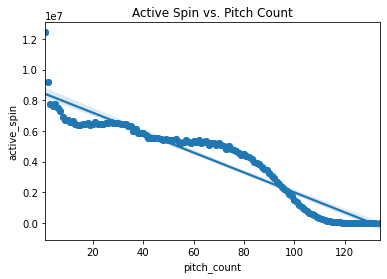

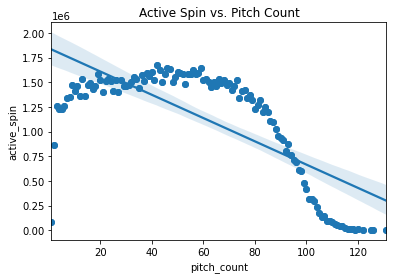

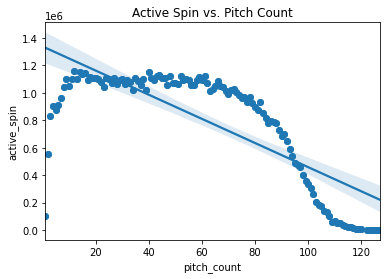

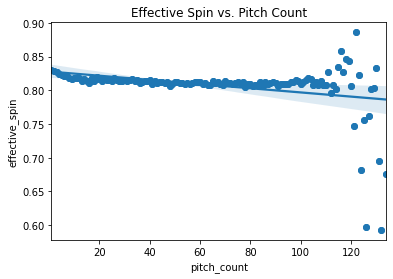

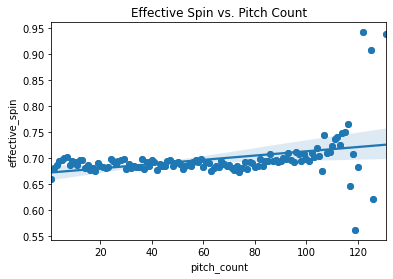

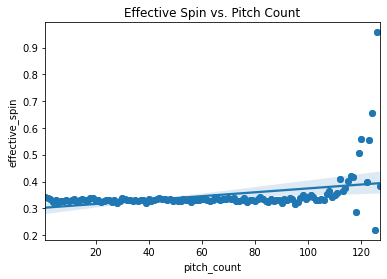

In [15]:
    Player_pitch = pitcher_data.loc[(pitcher_data['pitch_type']== 'FF')]
    player = Player_pitch.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum}).reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="active_spin",data=player)
    plt.title("Active Spin vs. Pitch Count")
    plt.ylabel("Active Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="active_spin",data=player)
    plt.show()
    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitch_type']== 'CU')]
    player = Player_pitch.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum}).reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="active_spin",data=player)
    plt.title("Active Spin vs. Pitch Count")
    plt.ylabel("Active Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="active_spin",data=player)
    plt.show()
    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitch_type']== 'SL')]
    player = Player_pitch.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum}).reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="active_spin",data=player)
    plt.title("Active Spin vs. Pitch Count")
    plt.ylabel("Active Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="active_spin",data=player)
    plt.show()
    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitch_type']== 'FF')]
    player = Player_pitch.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum}).reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="effective_spin",data=player)
    plt.title("Effective Spin vs. Pitch Count")
    plt.ylabel("Effective Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="effective_spin",data=player)
    plt.show()
    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitch_type']== 'CU')]
    player = Player_pitch.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum}).reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="effective_spin",data=player)
    plt.title("Effective Spin vs. Pitch Count")
    plt.ylabel("Effective Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="effective_spin",data=player)
    plt.show()
    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitch_type']== 'SL')]
    player = Player_pitch.groupby("pitch_count").agg({'active_spin':sum,'raw_spin':sum}).reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="effective_spin",data=player)
    plt.title("Effective Spin vs. Pitch Count")
    plt.ylabel("Effective Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="effective_spin",data=player)
    plt.show()

In [16]:
player.head()

,pitch_count,active_spin,raw_spin,effective_spin
0,1,105721.339894,3.086282e+05,0.342552
1,2,554811.313421,1.647458e+06,0.336768
2,3,834672.981574,2.498389e+06,0.334084
3,4,901246.950008,2.793964e+06,0.322569
4,5,872219.749837,2.640641e+06,0.330306


In [17]:
def plot_player_active(player_name, pitch_type):    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitcher_name']== player_name) & (pitcher_data['pitch_type']== pitch_type)]
    player = Player_pitch.groupby("pitch_count").mean().reset_index()
    player['effective_spin'] = player['active_spin']/player['raw_spin']
    plt.scatter(x="pitch_count",y="active_spin",data=player)
    plt.title("Active Spin vs. Pitch Count")
    plt.ylabel("Active Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="active_spin",data=player)
    plt.show()
    
def plot_player_effective(player_name, pitch_type):    
    Player_pitch = pitcher_data.loc[(pitcher_data['pitcher_name']== player_name) & (pitcher_data['pitch_type']== pitch_type)]
    playerX = Player_pitch.groupby("pitch_count").agg({'active_spin':sum, 'raw_spin':sum}).reset_index()
    playerX['effective_spin'] = playerX['active_spin']/playerX['raw_spin']
    plt.scatter(x="pitch_count",y="effective_spin",data=playerX)
    plt.title("Effective Spin vs. Pitch Count")
    plt.ylabel("Effective Spin")
    plt.xlabel("Pitch Count")
    sns.regplot(x="pitch_count",y="effective_spin",data=playerX)
    plt.show()

In [18]:
pitcher_data.loc[(pitcher_data['pitcher_name']== 'Steven Matz') & (pitcher_data['pitch_type']== 'FF')].sort_values('active_spin')

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba
339929,531300,2018-08-21,571927,Steven Matz,608717,Chris Stratton,5,2.0,85,FF,1715.334476,2204.595,0.778072,NaN,NaN
266106,530883,2018-07-21,571927,Steven Matz,519222,Austin Romine,3,1.0,31,FF,1752.524609,2066.975,0.847869,NaN,NaN
159163,530286,2018-06-03,571927,Steven Matz,600303,Tommy La Stella,3,1.0,30,FF,1800.966562,1984.000,0.907745,NaN,NaN
202244,530522,2018-06-21,571927,Steven Matz,453568,Charlie Blackmon,4,3.0,72,FF,1809.835026,2108.619,0.858303,NaN,NaN
8638,529455,2018-04-01,571927,Steven Matz,502054,Tommy Pham,1,1.0,8,FF,1917.379886,2143.020,0.894709,NaN,NaN
159165,530286,2018-06-03,571927,Steven Matz,600303,Tommy La Stella,3,1.0,32,FF,1925.078115,2064.626,0.932410,NaN,NaN
106287,529994,2018-08-16,571927,Steven Matz,656555,Rhys Hoskins,1,1.0,20,FF,1945.677544,2256.083,0.862414,NaN,NaN
106288,529994,2018-08-16,571927,Steven Matz,656555,Rhys Hoskins,1,1.0,21,FF,2046.850483,2185.610,0.936512,NaN,NaN
121530,530077,2018-05-19,571927,Steven Matz,502481,Jarrod Dyson,4,2.0,63,FF,2049.091136,2021.491,1.013653,NaN,NaN
425704,531815,2018-09-29,571927,Steven Matz,592407,Bryan Holaday,2,1.0,33,FF,2087.792055,2186.955,0.954657,NaN,NaN


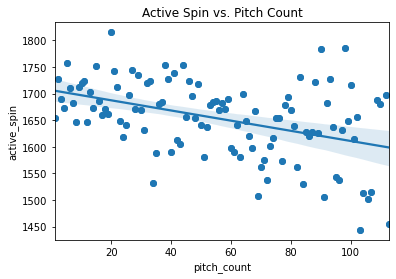

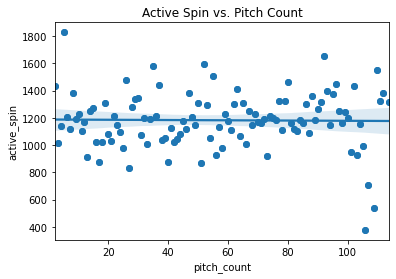

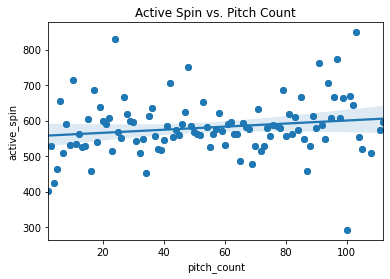

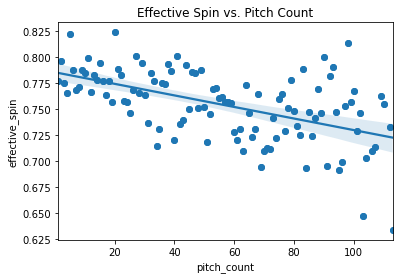

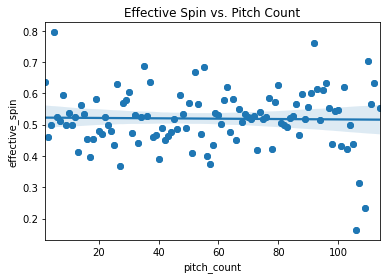

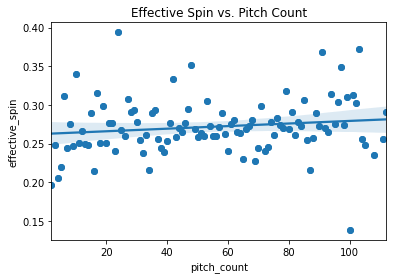

In [19]:
plot_player_active('Noah Syndergaard', 'FF')
plot_player_active('Noah Syndergaard', 'CU')
plot_player_active('Noah Syndergaard', 'SL')
plot_player_effective('Noah Syndergaard', 'FF')
plot_player_effective('Noah Syndergaard', 'CU')
plot_player_effective('Noah Syndergaard', 'SL')

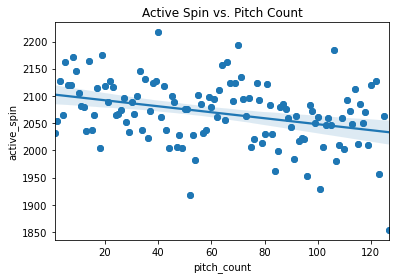

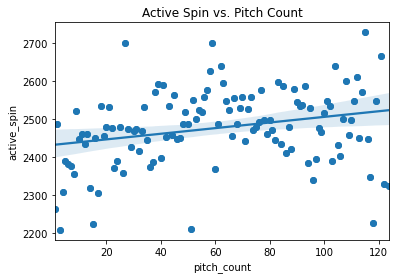

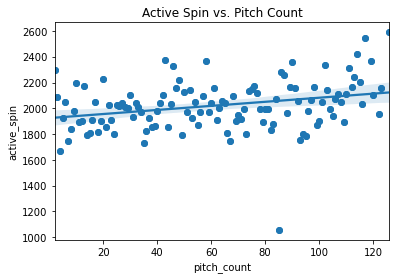

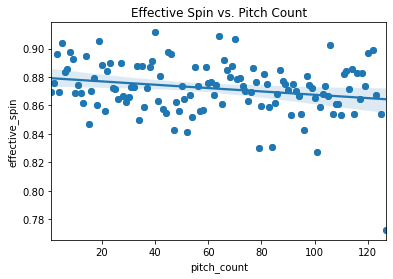

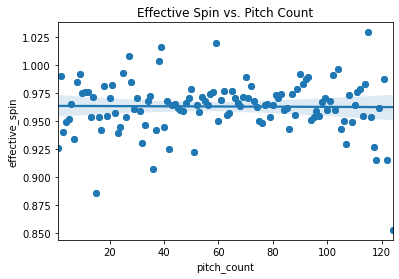

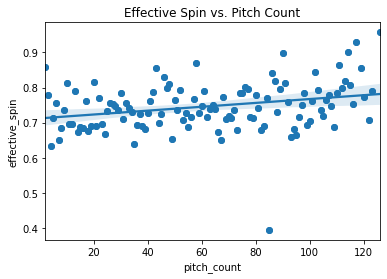

In [20]:
plot_player_active('Trevor Bauer', 'FF')
plot_player_active('Trevor Bauer', 'KC')
plot_player_active('Trevor Bauer', 'SL')
plot_player_effective('Trevor Bauer', 'FF')
plot_player_effective('Trevor Bauer', 'KC')
plot_player_effective('Trevor Bauer', 'SL')

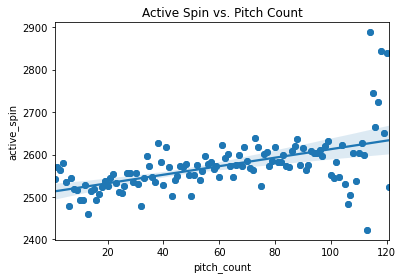

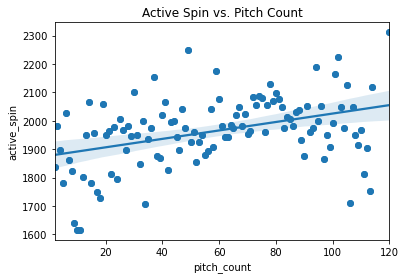

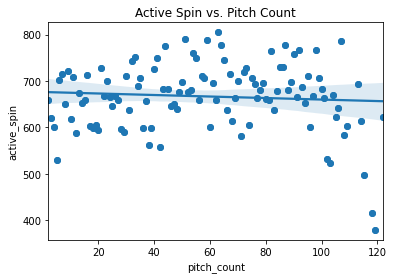

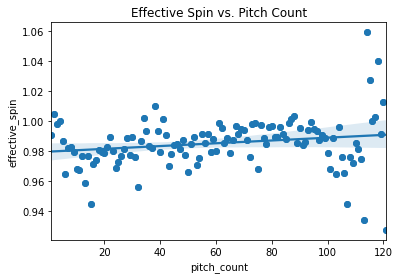

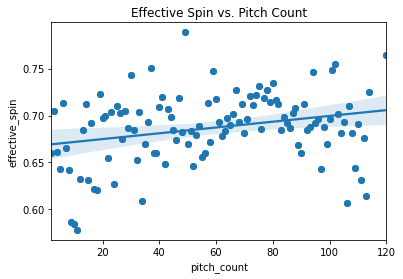

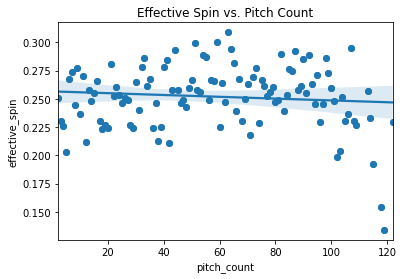

In [21]:
plot_player_active('Justin Verlander', 'FF')
plot_player_active('Justin Verlander', 'CU')
plot_player_active('Justin Verlander', 'SL')
plot_player_effective('Justin Verlander', 'FF')
plot_player_effective('Justin Verlander', 'CU')
plot_player_effective('Justin Verlander', 'SL')

In [22]:
pitcher_data.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,1,FF,1672.898220,2045.595,0.817805,0.0,1.701
1,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,2,FF,1855.568629,2159.595,0.859221,NaN,NaN
2,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,3,FF,1925.181992,2212.629,0.870088,NaN,NaN
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,4,CH,1699.629121,1832.357,0.927564,0.0,0.048
4,529406,2018-03-29,502042,Chris Archer,434670,Hanley Ramirez,1,1.0,5,FF,2019.269462,2254.516,0.895655,NaN,NaN


In [23]:
woba_analysis = pitcher_data.dropna()

In [24]:
woba_analysis.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,1,FF,1672.898220,2045.595,0.817805,0.000,1.701
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,4,CH,1699.629121,1832.357,0.927564,0.000,0.048
24,529406,2018-03-29,519242,Chris Sale,460576,Carlos Gómez,1,1.0,13,CH,1941.521393,2067.964,0.938856,0.000,0.000
34,529406,2018-03-29,502042,Chris Archer,593428,Xander Bogaerts,2,1.0,22,FF,1831.690416,2189.001,0.836770,1.247,1.076
39,529406,2018-03-29,502042,Chris Archer,646240,Rafael Devers,2,1.0,27,SL,1201.842991,2582.602,0.465361,0.000,0.067


In [25]:
def plot_player_woba(player_name, pitch_type):    
    woba_player_pitch = woba_analysis.loc[(woba_analysis['pitcher_name']== player_name) & (pitcher_data['pitch_type']== pitch_type)]
    plt.scatter(x="speedangle_woba",y="active_spin",data=woba_player_pitch)
    plt.title("Active Spin vs. wOBA")
    plt.ylabel("Active Spin")
    plt.xlabel("wOBA")
    sns.regplot(x="speedangle_woba",y="active_spin",data=woba_player_pitch)
    plt.show()

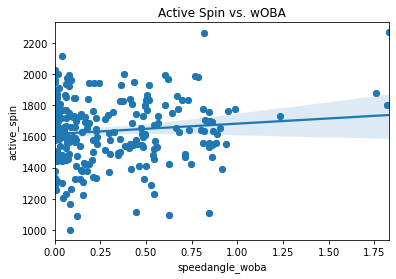

In [26]:
plot_player_woba('Noah Syndergaard', 'FF')

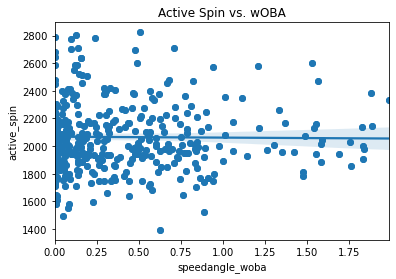

In [27]:
plot_player_woba('Trevor Bauer','FF')

In [28]:
woba_analysis.to_csv('woba.csv')

In [29]:
woba_analysis.head()

,game_pk,game_date,pitcher_id,pitcher_name,batter_id,batter_name,inning,times_thru_order,pitch_count,pitch_type,active_spin,raw_spin,effective_spin,fangraphs_woba,speedangle_woba
0,529406,2018-03-29,502042,Chris Archer,605141,Mookie Betts,1,1.0,1,FF,1672.898220,2045.595,0.817805,0.000,1.701
3,529406,2018-03-29,502042,Chris Archer,643217,Andrew Benintendi,1,1.0,4,CH,1699.629121,1832.357,0.927564,0.000,0.048
24,529406,2018-03-29,519242,Chris Sale,460576,Carlos Gómez,1,1.0,13,CH,1941.521393,2067.964,0.938856,0.000,0.000
34,529406,2018-03-29,502042,Chris Archer,593428,Xander Bogaerts,2,1.0,22,FF,1831.690416,2189.001,0.836770,1.247,1.076
39,529406,2018-03-29,502042,Chris Archer,646240,Rafael Devers,2,1.0,27,SL,1201.842991,2582.602,0.465361,0.000,0.067
